# Задача
С помощью скрипта на python преобразовать исходные данные: 

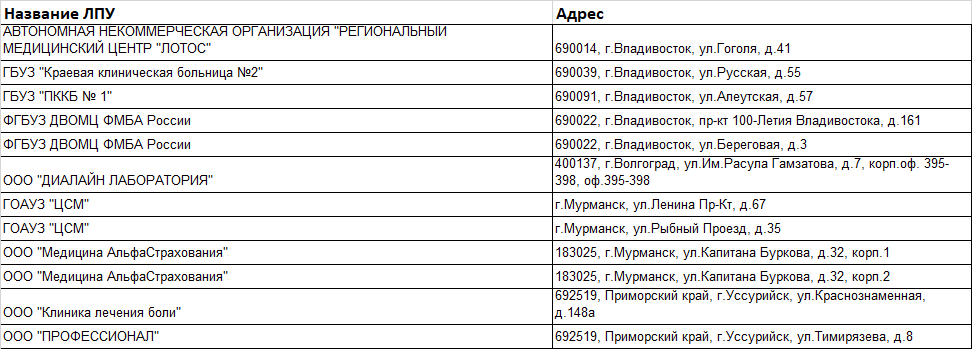

до датафрейма требуемого формата:


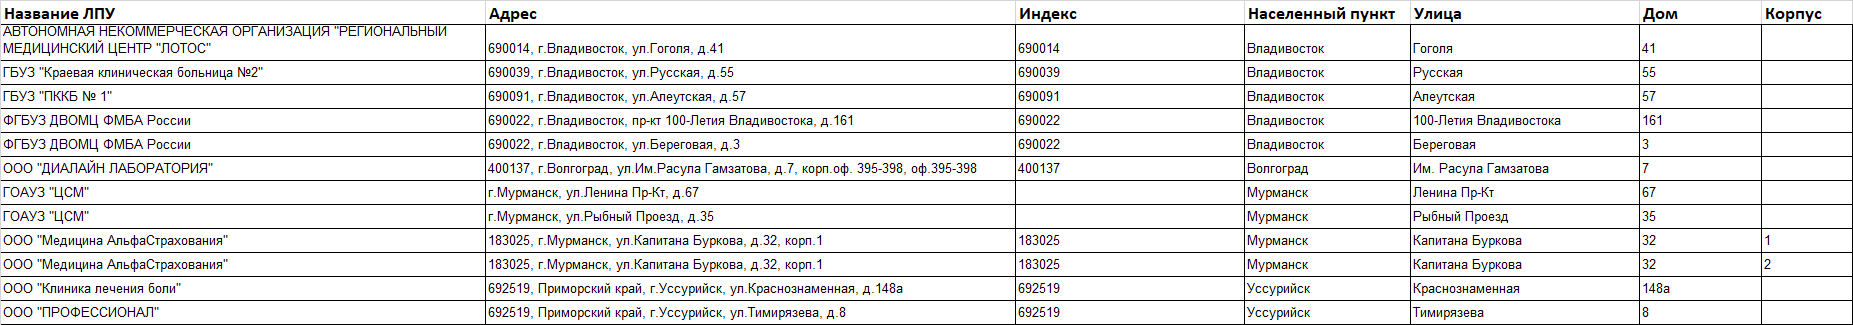

In [23]:
import pandas as pd

# 1 способ через lambda, split и strip

In [25]:
def tender_excel_1(file_path):
    df = pd.read_excel(file_path) # Читаем файл
    # Добавляем новые колонки и ищем для них нужные данные
    df['Индекс'] = df['Адрес'].apply(lambda x: x.split(',')[0] if x[0].isdigit() else '') 
    df['Населенный пункт'] = df['Адрес'].apply(lambda x: x.split('г.')[1].split(',')[0].strip() if 'г.' in x else '') 
    df['Улица'] = df['Адрес'].apply(lambda x: x.split('ул.')[1].split(',')[0].strip() if 'ул.' in x else (x.split('пр-кт ')[1].split(',')[0].strip() if 'пр-кт' in x else '')) 
    df['Дом'] = df['Адрес'].apply(lambda x: x.split('д.')[1].split(',')[0].strip() if 'д.' in x else '') 
    df['Корпус'] = df['Адрес'].apply(lambda x: x.split('корп.')[1].split(',')[0].strip() if 'корп.' in x and 'корп.оф.' not in x else '') 
    
    return df

file_path = 'C:/Users/Acer/Python/задание_2_тендер.xlsx'
df = tender_excel_1(file_path)

# Сохраняем измененный файл
df.to_excel('тендер_вывод_1.xlsx', sheet_name = 'Вывод', index = False)

# 2 способ через extract и регулярные выражения

In [26]:
def tender_excel_2(file_path):
    df = pd.read_excel(file_path) # Читаем файл
    # Добавляем новые колонки и достаем из "Адреса" нужные данные
    df[['Индекс', 'Населенный пункт', 'Улица', 'Дом', 'Корпус']] = df['Адрес'].str.extract(r'(\d+)?[^г]*г\.\s*([^,]+),\s*(?:ул\.|пр-кт)\s*([^,]+),\s*д\.\s*(\d+)(?:,\s*корп\.\s*(\d+))?.*').fillna('')
    return df

file_path = 'C:/Users/Acer/Python/задание_2_тендер.xlsx'
df = tender_excel_2(file_path)

# Сохраняем измененный файл
df.to_excel('тендер_вывод_2.xlsx', sheet_name='Вывод', index=False)